In [39]:
from utilities import clean_data, missing_values, derivatives_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df, _, _, _, _, _,_ = clean_data()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298040 entries, 0 to 298039
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         298040 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  298040 non-null  object        
 2   followers                               236313 non-null  float64       
 3   pictures                                294176 non-null  float64       
 4   videos                                  288438 non-null  float64       
 5   comments                                293958 non-null  float64       
 6   likes                                   294288 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 15.9+ MB


In [21]:
df_cleaned = missing_values(df)
df_cleaned.info()

Number of rows with at least one NaN before cleaning: 65868
Number of rows with at least one NaN after dropping series of Nan's at beginning of businesses: 4378
Total NaN entries: 14027

 Remaining number of rows with Nan that are not at beginning or end:
Number of rows with 4 NaNs: 3214
Number of rows with 3 NaNs: 0
Number of rows with 2 NaNs: 7
Number of rows with 1 NaNs: 924
Total remaining rows with at least one Nan:  4145
Total entries being an Nan:  13794
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298040 entries, 0 to 298039
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         298040 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  298040 non-null  object        
 2   followers                               236313 non-null  float64       
 3   pictures                          

In [22]:
df_cleaned.dropna(inplace=True)

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232172 entries, 0 to 236549
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         232172 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  232172 non-null  object        
 2   followers                               232172 non-null  float64       
 3   pictures                                232172 non-null  float64       
 4   videos                                  232172 non-null  float64       
 5   comments                                232172 non-null  float64       
 6   likes                                   232172 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.2+ MB


In [32]:
df_change_rate, df_curvature = derivatives_data(df_cleaned)

In [34]:
df_change_rate.fillna(0, inplace=True)
df_change_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232172 entries, 0 to 236549
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         232172 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  232172 non-null  object        
 2   change in pictures                      232172 non-null  float64       
 3   change in videos                        232172 non-null  float64       
 4   change in comments                      232172 non-null  float64       
 5   change in likes                         232172 non-null  float64       
 6   change in followers                     232172 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.2+ MB


In [31]:
df_change_rate.describe()

,period_end_date,change in pictures,change in videos,change in comments,change in likes,change in followers
count,232172,232172.000000,232172.000000,2.321720e+05,2.321720e+05,2.321720e+05
mean,2020-04-14 13:19:08.851713280,125.077361,27.999892,1.117173e+04,7.172399e+05,1.817647e+01
min,2015-01-03 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,-4.292336e+08
25%,2018-09-15 00:00:00,17.000000,2.000000,3.610000e+02,1.449800e+04,2.740000e+02
50%,2020-06-20 00:00:00,40.000000,7.000000,1.423000e+03,7.865850e+04,1.726000e+03
75%,2022-02-12 00:00:00,105.000000,21.000000,5.556250e+03,3.652775e+05,8.157250e+03
max,2023-09-16 00:00:00,10498.000000,1910.000000,3.179575e+06,1.206897e+08,3.772801e+07
std,NaN,280.489100,78.099527,5.881802e+04,2.629938e+06,1.093285e+06


Text(0, 0.5, 'change in followers')

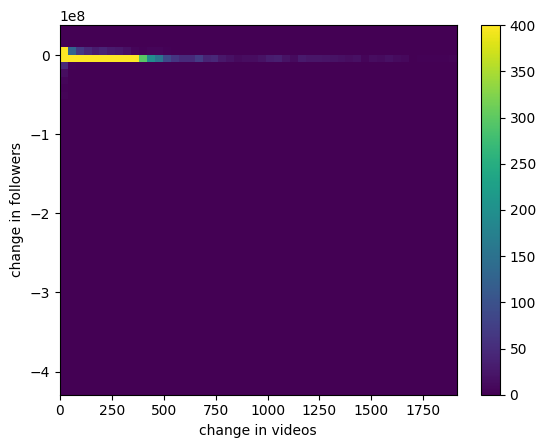

In [36]:
plt.hist2d(df_change_rate['change in videos'], df_change_rate['change in followers'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('change in videos')
plt.ylabel('change in followers')

In [37]:
date = pd.to_datetime(df_change_rate.pop('period_end_date'), format='%Y-%m-%d')

In [38]:
date

0        2017-09-23
1        2017-09-30
2        2017-10-07
3        2017-10-14
4        2017-10-21
            ...    
236545   2023-08-19
236546   2023-08-26
236547   2023-09-02
236548   2023-09-09
236549   2023-09-16
Name: period_end_date, Length: 232172, dtype: datetime64[ns]

In [76]:
# comput the sin/cosine of the month, and year
df_change_rate['month_sin'] = date.dt.month.apply(lambda x: np.sin(2 * np.pi * x / 12))
df_change_rate['month_cos'] = date.dt.month.apply(lambda x: np.cos(2 * np.pi * x / 12))
df_change_rate['year_sin'] = date.dt.isocalendar().week.apply(lambda x: np.sin(2 * np.pi * x / 52))
df_change_rate['year_cos'] = date.dt.isocalendar().week.apply(lambda x: np.cos(2 * np.pi * x / 52))

# # Compute week of the year
# df['week_of_year'] = df['date_column'].dt.isocalendar().week

# # Compute month of the year
# df['month_of_year'] = df['date_column'].dt.month

# # Compute year sine and cosine features
# df['year_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
# df['year_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

# # Compute month sine and cosine features
# df['month_sin'] = np.sin(2 * np.pi * df['month_of_year'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month_of_year'] / 12)


Text(0.5, 1.0, 'Time of day signal')

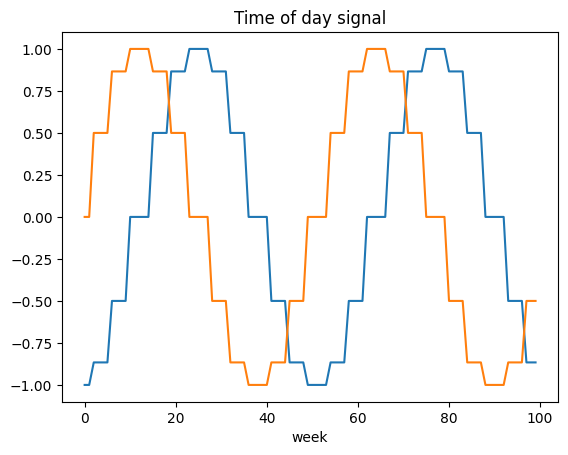

In [77]:
num_data = 100
plt.plot(np.array(df_change_rate['month_sin'])[:num_data])
plt.plot(np.array(df_change_rate['month_cos'])[:num_data])
plt.xlabel('week')
plt.title('Time of day signal')

In [48]:
import tensorflow as tf

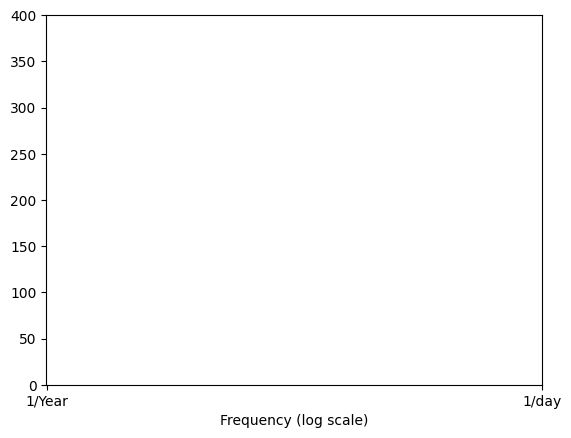

In [78]:
fft = tf.signal.rfft(df_change_rate['change in followers'])
f_per_dataset = np.arange(0, len(fft))

n_samples_w = len(df_change_rate['change in followers'])
weeks_per_year = 365.2524/7
years_per_dataset = n_samples_w/(weeks_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.ylim(0, 400)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Split the data without random sampling

In [79]:
df_for_model = df_change_rate.copy()
df_for_model.columns

Index(['business_entity_doing_business_as_name', 'change in pictures',
       'change in videos', 'change in comments', 'change in likes',
       'change in followers', 'month_sin', 'month_cos', 'year_sin',
       'year_cos'],
      dtype='object')

In [80]:
# encode the business_entity_doing_business_as_name column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_for_model['business_entity_doing_business_as_name'] = le.fit_transform(df_for_model['business_entity_doing_business_as_name'])
df_for_model.head()

,business_entity_doing_business_as_name,change in pictures,change in videos,change in comments,change in likes,change in followers,month_sin,month_cos,year_sin,year_cos
0,0,75.0,10.0,196.0,18853.0,0.0,-1.000000,-1.836970e-16,-0.992709,-1.205367e-01
1,0,65.0,13.0,187.0,17755.0,949.0,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16
2,0,55.0,12.0,144.0,15733.0,918.0,-0.866025,5.000000e-01,-0.992709,1.205367e-01
3,0,46.0,13.0,118.0,14802.0,1027.0,-0.866025,5.000000e-01,-0.970942,2.393157e-01
4,0,46.0,10.0,119.0,14450.0,391.0,-0.866025,5.000000e-01,-0.935016,3.546049e-01


In [72]:
df[df["business_entity_doing_business_as_name"]=="24S"]["period_end_date"]

0     2017-05-06
1     2017-05-13
2     2017-05-20
3     2017-05-27
4     2017-06-03
         ...    
328   2023-08-19
329   2023-08-26
330   2023-09-02
331   2023-09-09
332   2023-09-16
Name: period_end_date, Length: 333, dtype: datetime64[ns]

In [86]:
df_for_model_one_brand = df_for_model[df_for_model['business_entity_doing_business_as_name'] == 0].drop(columns=['business_entity_doing_business_as_name'])

In [87]:
column_indices = {name: i for i, name in enumerate(df_for_model_one_brand.columns)}
n = len(df_for_model_one_brand)
train_size = 0.7
val_size = 0.2
test_size = 0.1
train_df = df_for_model_one_brand[0:int(n*train_size)]
val_df = df_for_model_one_brand[int(n*train_size):int(n*(train_size+val_size))]
test_df = df_for_model_one_brand[int(n*(train_size+val_size)):]
num_features = df_for_model_one_brand.shape[1]

In [88]:
### Normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [89]:
import seaborn as sns

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_86450/1598312847.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df_for_model_one_brand.keys(), rotation=90)


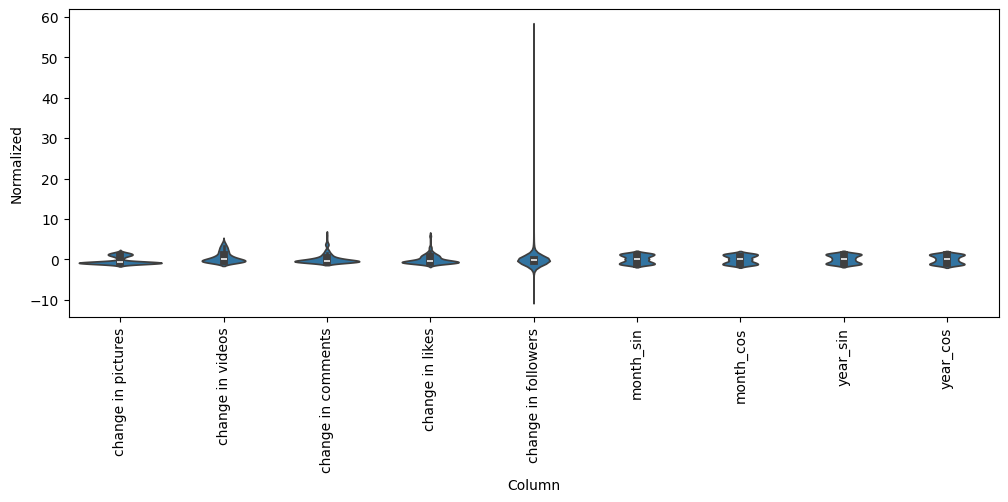

In [92]:
### plot the distribution of the data
df_std = (df_for_model_one_brand - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 4))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_for_model_one_brand.keys(), rotation=90)

In [93]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [99]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['change in followers'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['change in followers']

In [100]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['change in likes'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['change in likes']

In [101]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [102]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
Labels shape: (3, 1, 1)


In [103]:
w2.example = example_inputs, example_labels

In [106]:
def plot(self, model=None, plot_col='change in followers', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('week')

WindowGenerator.plot = plot

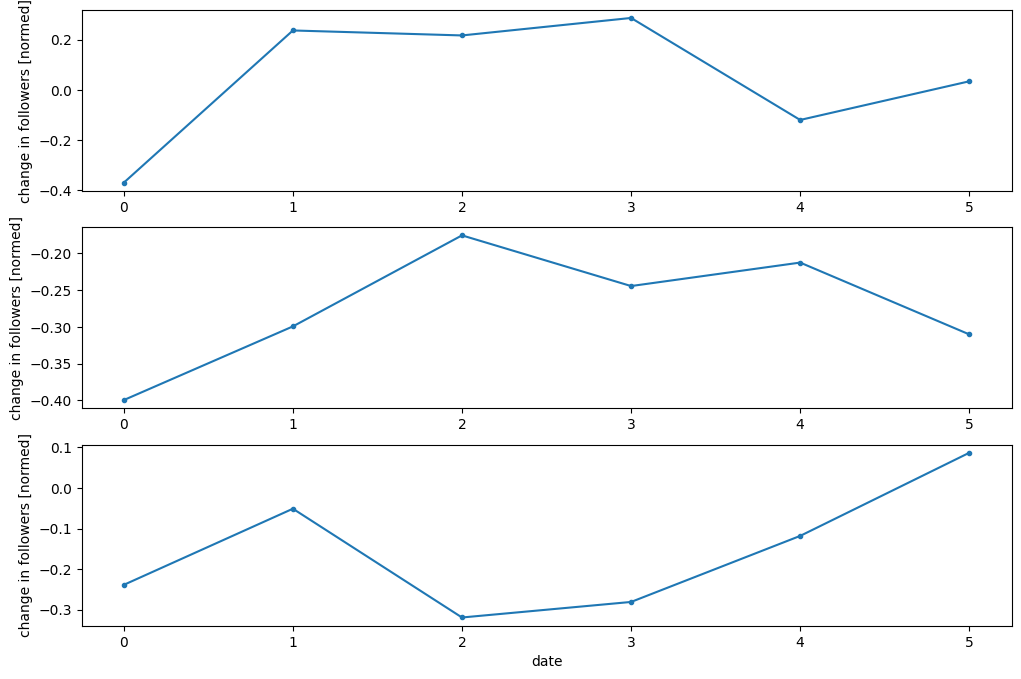

In [105]:
w2.plot()

In [107]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [108]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [109]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [110]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 9)
Labels shape (batch, time, features): (32, 1, 1)


2024-04-28 02:13:04.279457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [112]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['change in followers'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['change in followers']

In [113]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


2024-04-28 02:15:13.234567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [114]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [115]:
baseline = Baseline(label_index=column_indices['change in followers'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.6953 - mean_absolute_error: 3.1588 


In [132]:
num_weeks = 26
wide_window = WindowGenerator(
    input_width=num_weeks, label_width=num_weeks, shift=1,
    label_columns=['change in followers'])

wide_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Label column name(s): ['change in followers']

In [133]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 26, 9)
Output shape: (32, 26, 1)


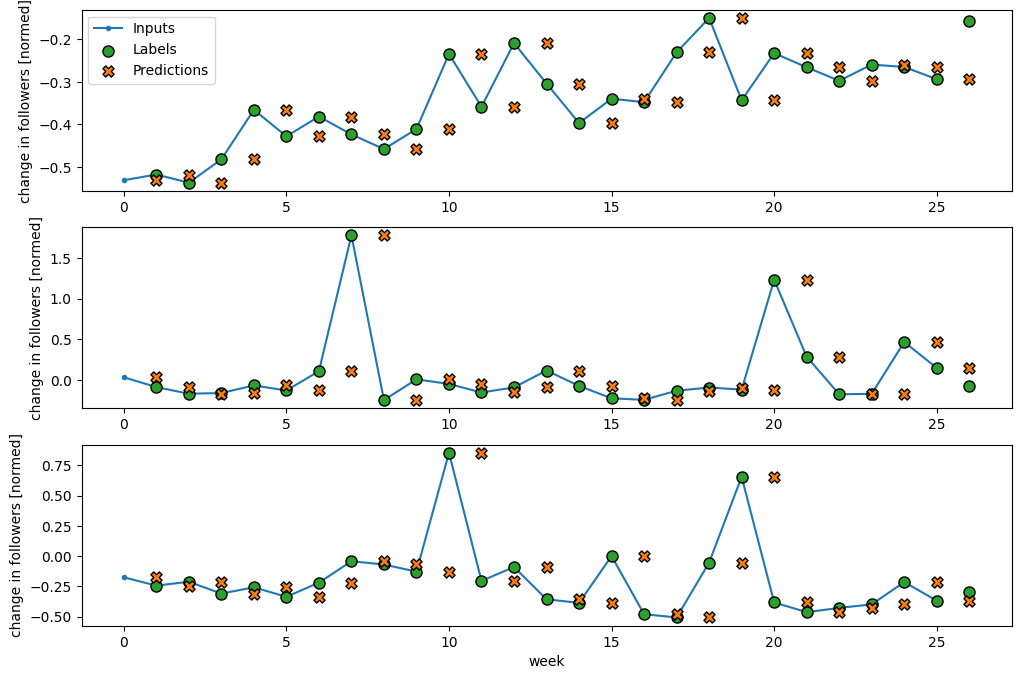

In [134]:
wide_window.plot(baseline)

### Linear Model

In [137]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [138]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7977 - mean_absolute_error: 1.3403 - val_loss: 66.9538 - val_mean_absolute_error: 2.8816
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6335 - mean_absolute_error: 1.1865 - val_loss: 66.6221 - val_mean_absolute_error: 2.8589
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4029 - mean_absolute_error: 1.3105 - val_loss: 66.2843 - val_mean_absolute_error: 2.8358
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8702 - mean_absolute_error: 1.3110 - val_loss: 65.9662 - val_mean_absolute_error: 2.8149
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2908 - mean_absolute_error: 1.1330 - val_loss: 65.6496 - val_mean_absolute_error: 2.7941
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1313 - mean_absolute_error: 1.1107 - val_loss: 65.3519 - val_mean_absolute_error: 2.7741
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2516 - mean_absolute_error: 1.1326 - val_loss: 65.0375 - val

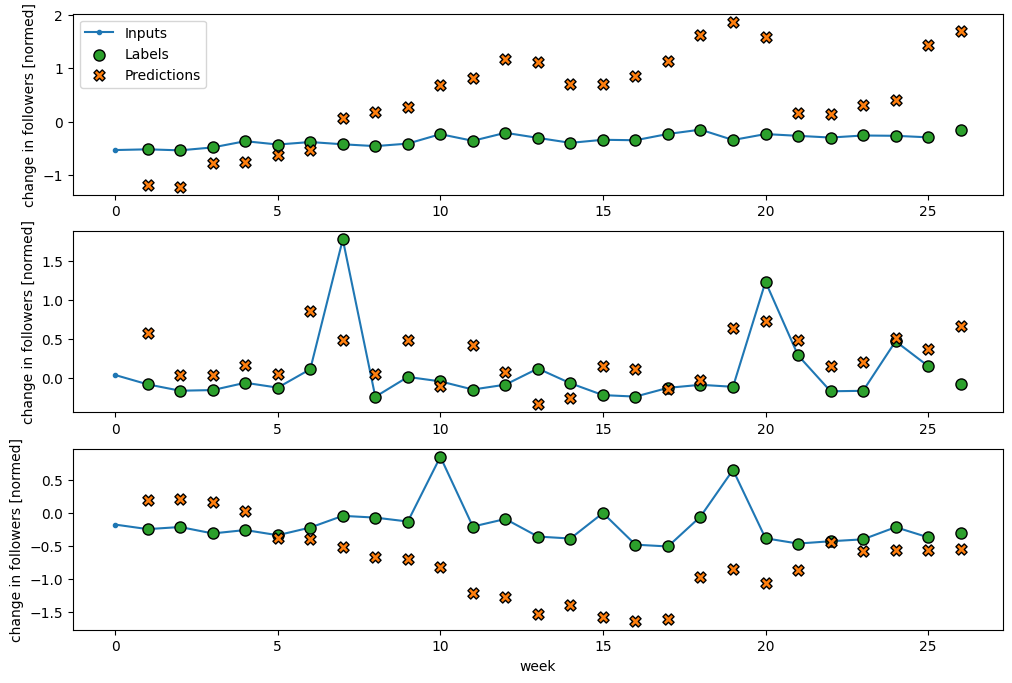

In [139]:
wide_window.plot(linear)

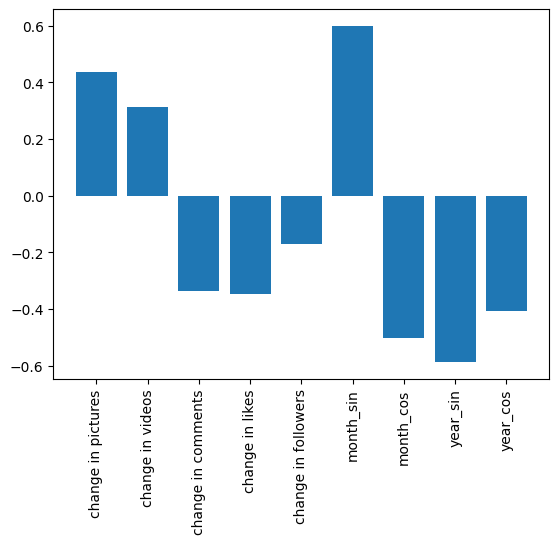

In [140]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

In [141]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0151 - mean_absolute_error: 0.3746 - val_loss: 54.4952 - val_mean_absolute_error: 1.8865
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8261 - mean_absolute_error: 0.5007 - val_loss: 54.3949 - val_mean_absolute_error: 1.8338
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0476 - mean_absolute_error: 0.3843 - val_loss: 54.5926 - val_mean_absolute_error: 1.7723
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9687 - mean_absolute_error: 0.3950 - val_loss: 54.7539 - val_mean_absolute_error: 1.8004
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.9312 - mean_absolute_error: 2.0257  


In [143]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['change in followers'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['change in followers']

### Multi-step dense

In [144]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [146]:
import IPython
import IPython.display

In [147]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.3683 - mean_absolute_error: 1.8270  


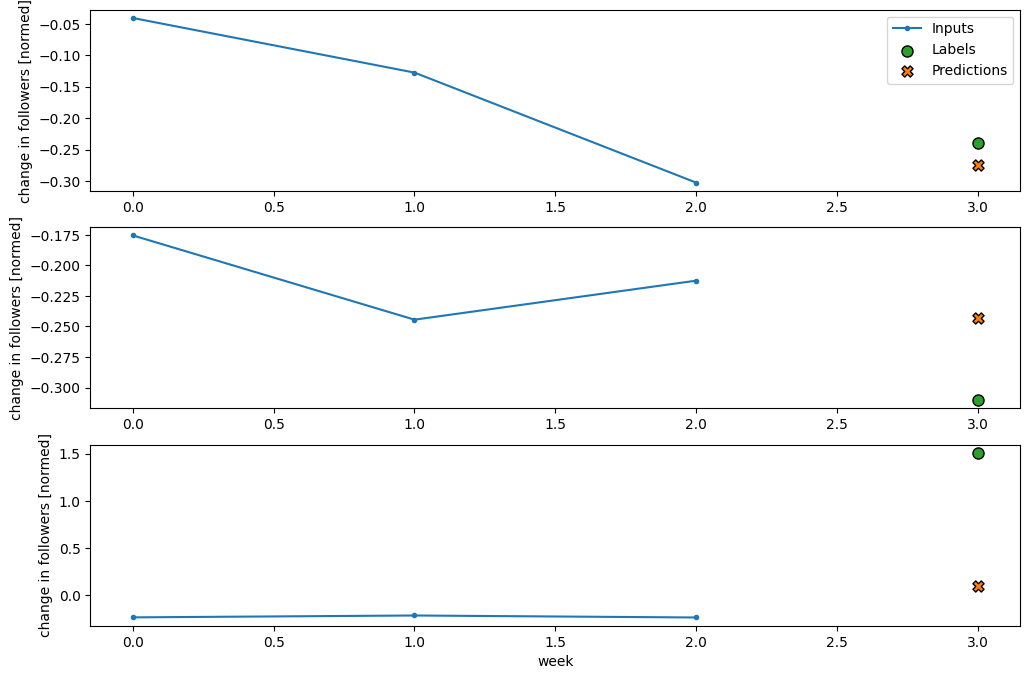

In [148]:
conv_window.plot(multi_step_dense)

### Convolution neural network

In [149]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [150]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.7914 - mean_absolute_error: 2.0236  


In [152]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['change in followers'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['change in followers']

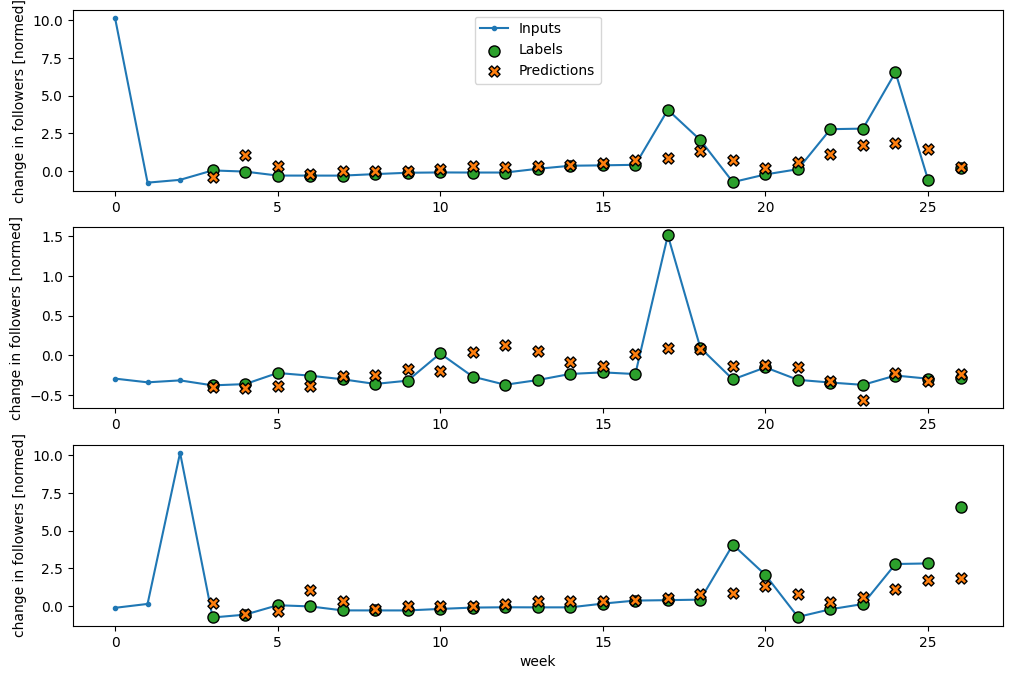

In [153]:
wide_conv_window.plot(conv_model)

### Recurrent Neural Network - LSTM

In [154]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [155]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5897 - mean_absolute_error: 0.7150


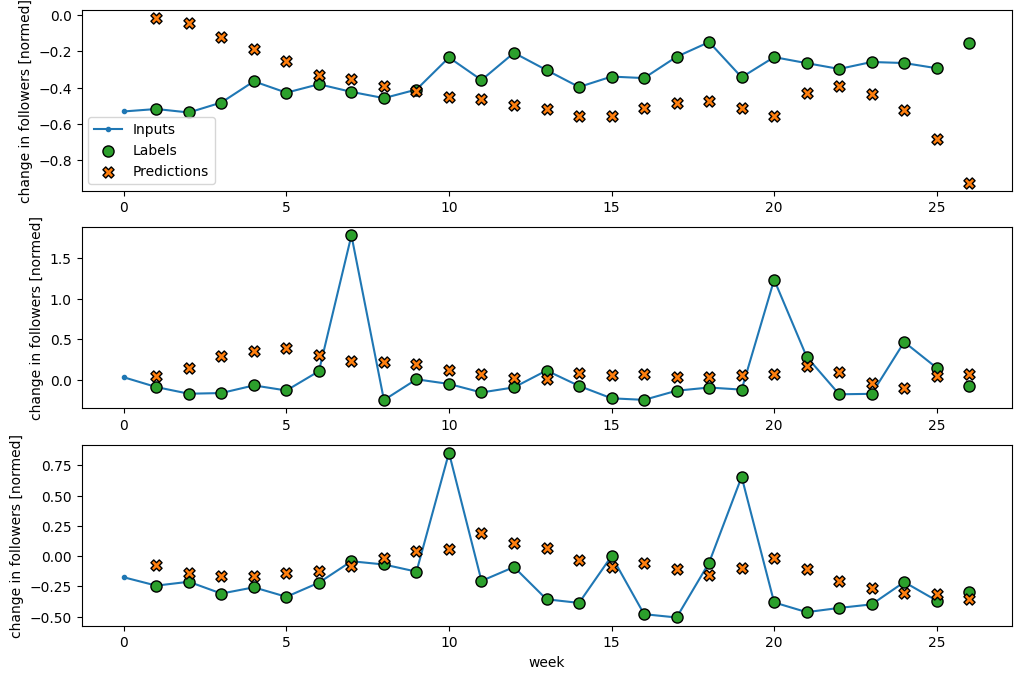

In [156]:
wide_window.plot(lstm_model)

### Performance

In [157]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [159]:
val_performance

{'Baseline': {'loss': 0.0, 'mean_absolute_error': 0.0},
 'Linear': {'loss': 61.58991241455078,
  'mean_absolute_error': 2.494767189025879},
 'Dense': {'loss': 54.75389862060547,
  'mean_absolute_error': 1.8004212379455566},
 'Multi step dense': {'loss': 56.36695861816406,
  'mean_absolute_error': 1.6028573513031006},
 'Conv': {'loss': 55.67130661010742,
  'mean_absolute_error': 1.7346497774124146},
 'LSTM': {'loss': 11.445412635803223,
  'mean_absolute_error': 0.729415237903595}}

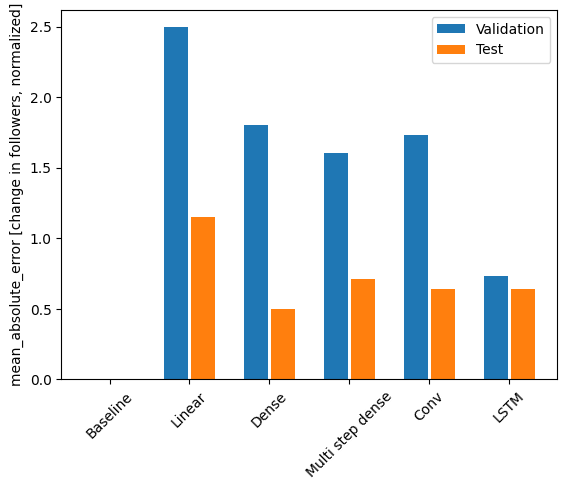

In [161]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [change in followers, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [162]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.0000
Linear      : 1.1517
Dense       : 0.4966
Multi step dense: 0.7123
Conv        : 0.6421
LSTM        : 0.6408


## Multi-output models

In [247]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=num_weeks, label_width=1, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 26, 9)
Labels shape (batch, time, features): (32, 1, 9)


2024-04-28 03:09:13.878472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Baseline

In [248]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [249]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3057 - mean_absolute_error: 0.9815 


### Dense

In [250]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [251]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3785 - mean_absolute_error: 0.4922 


### RNN

In [252]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0, return_dict=True)

print()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8449 - mean_absolute_error: 0.4854 

CPU times: user 1.97 s, sys: 484 ms, total: 2.45 s
Wall time: 1.67 s


### Advanced: Residual connections

In [253]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [254]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)
print()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0507 - mean_absolute_error: 0.2687 

CPU times: user 1.87 s, sys: 450 ms, total: 2.32 s
Wall time: 1.56 s


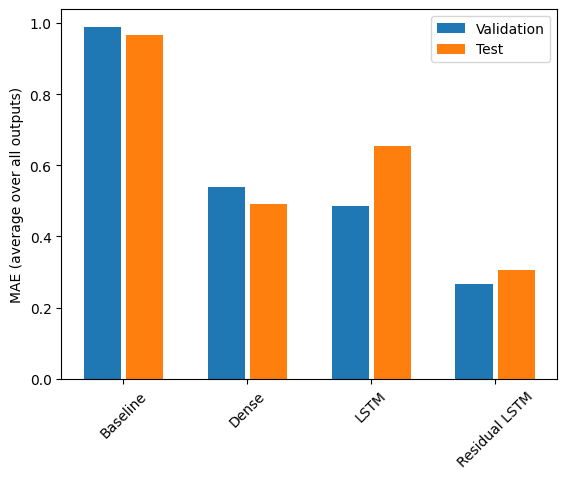

In [255]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [256]:
for name, value in performance.items():
  print(f'{name:15s}: {value[metric_name]:0.4f}')

Baseline       : 0.9668
Dense          : 0.4912
LSTM           : 0.6535
Residual LSTM  : 0.3048


## Multi-step models

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): None

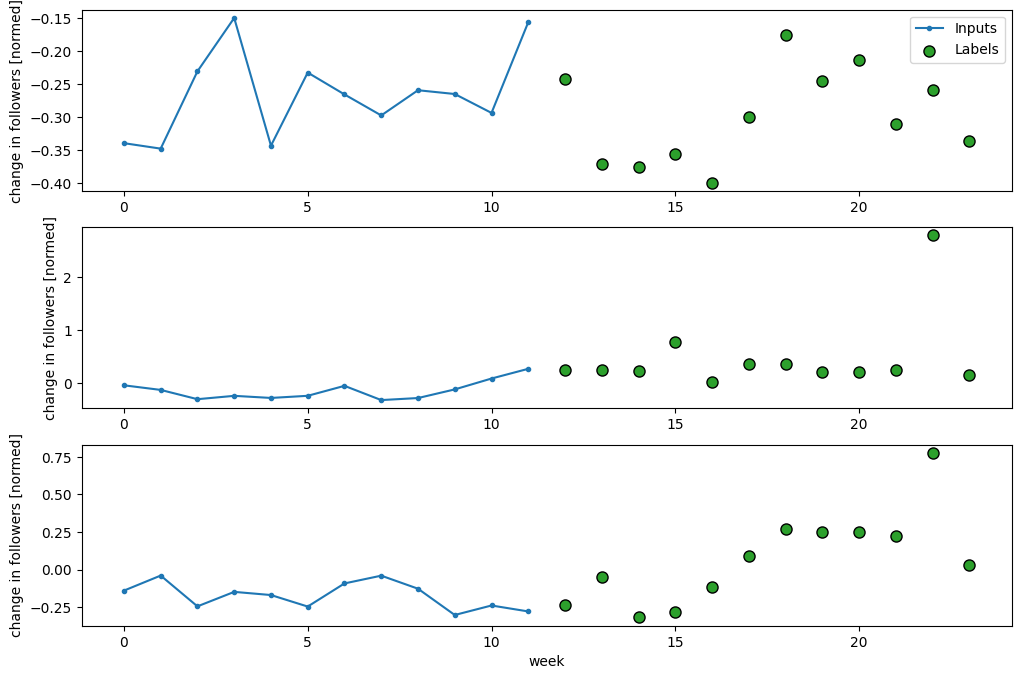

In [228]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=12,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baseline

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0089 - mean_absolute_error: 0.6257 


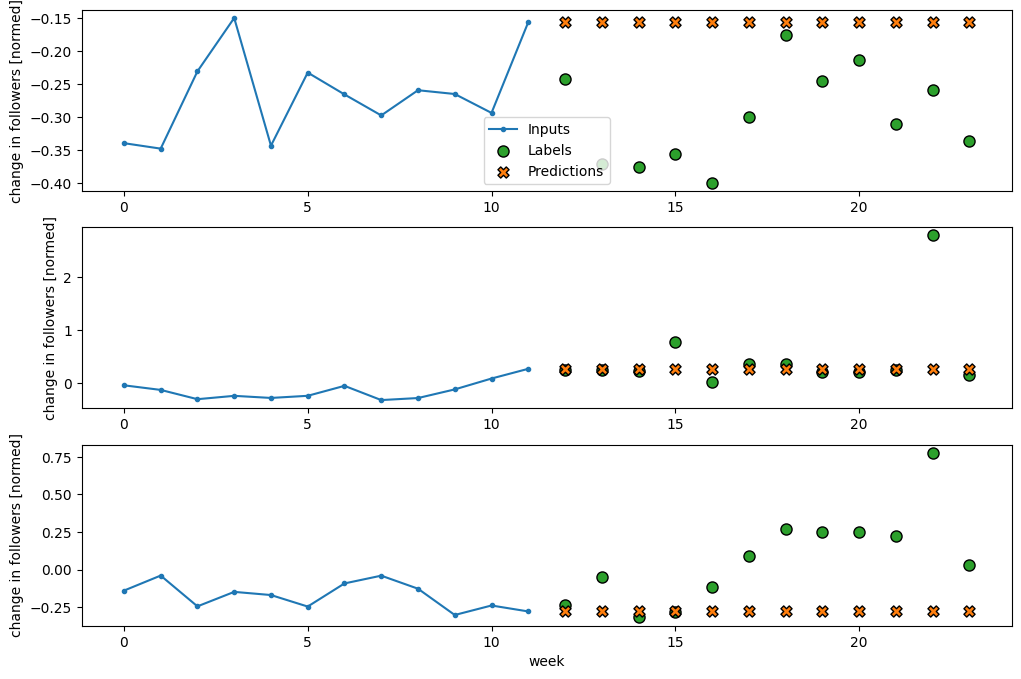

In [229]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3558 - mean_absolute_error: 1.0674 


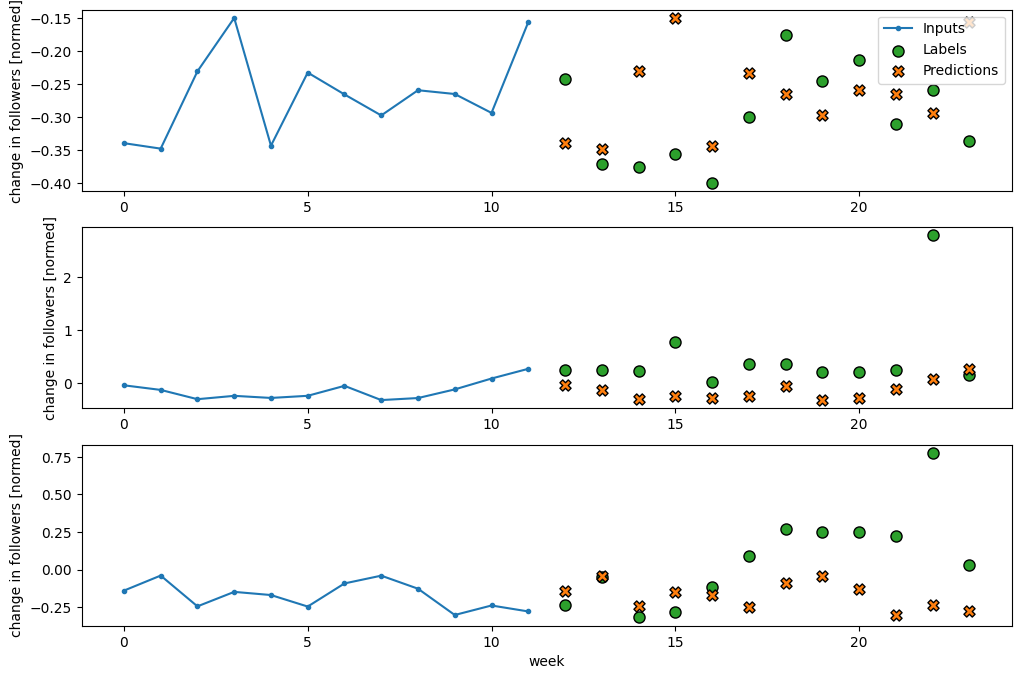

In [230]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(repeat_baseline)

### Single-shot models

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0789 - mean_absolute_error: 0.7864 


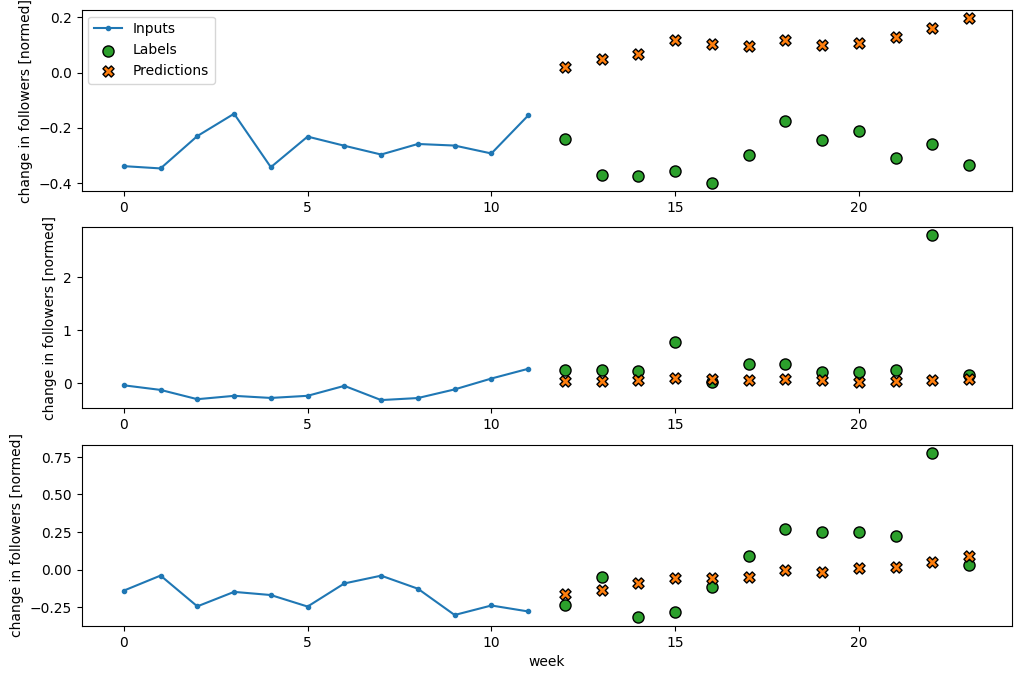

In [231]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)

### Dense

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6375 - mean_absolute_error: 0.4560 


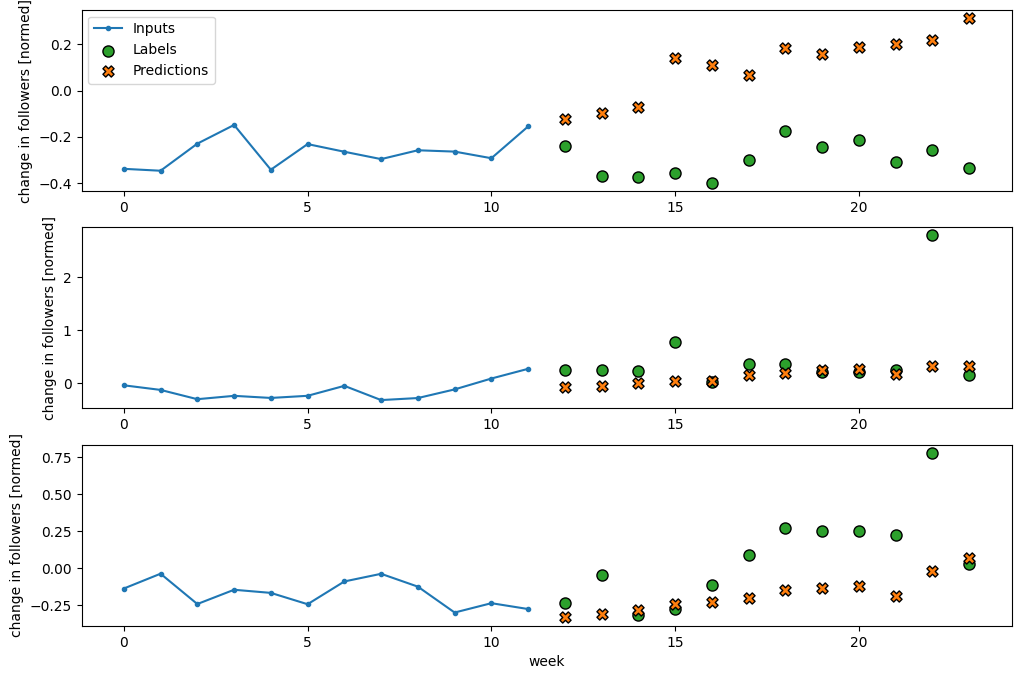

In [232]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)

### CNN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6906 - mean_absolute_error: 0.4723 


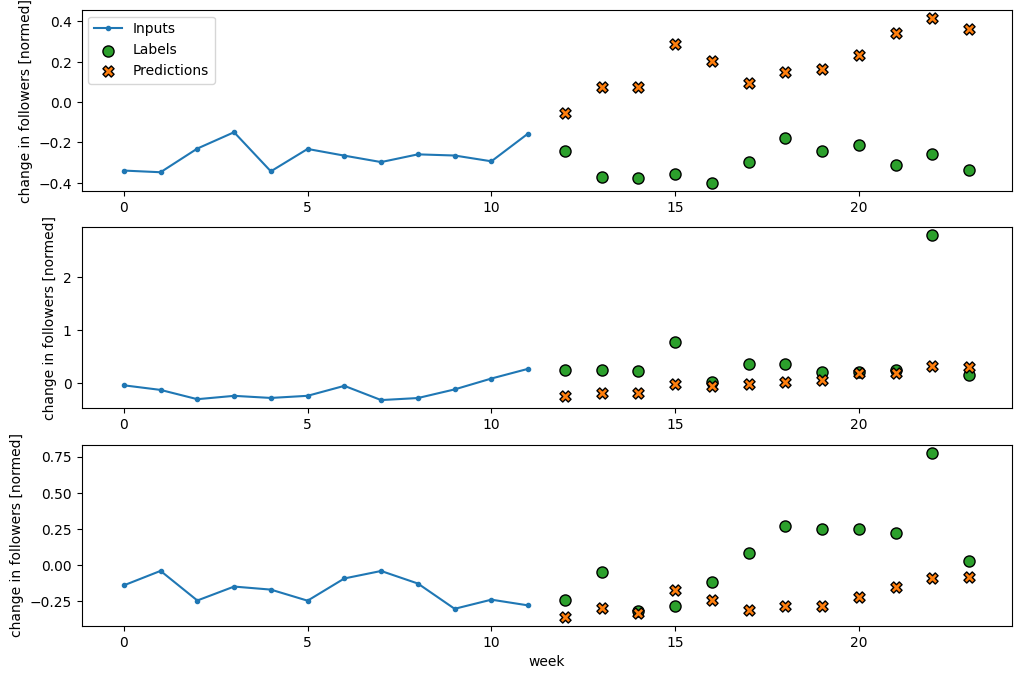

In [233]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

### RNN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8677 - mean_absolute_error: 0.5076 


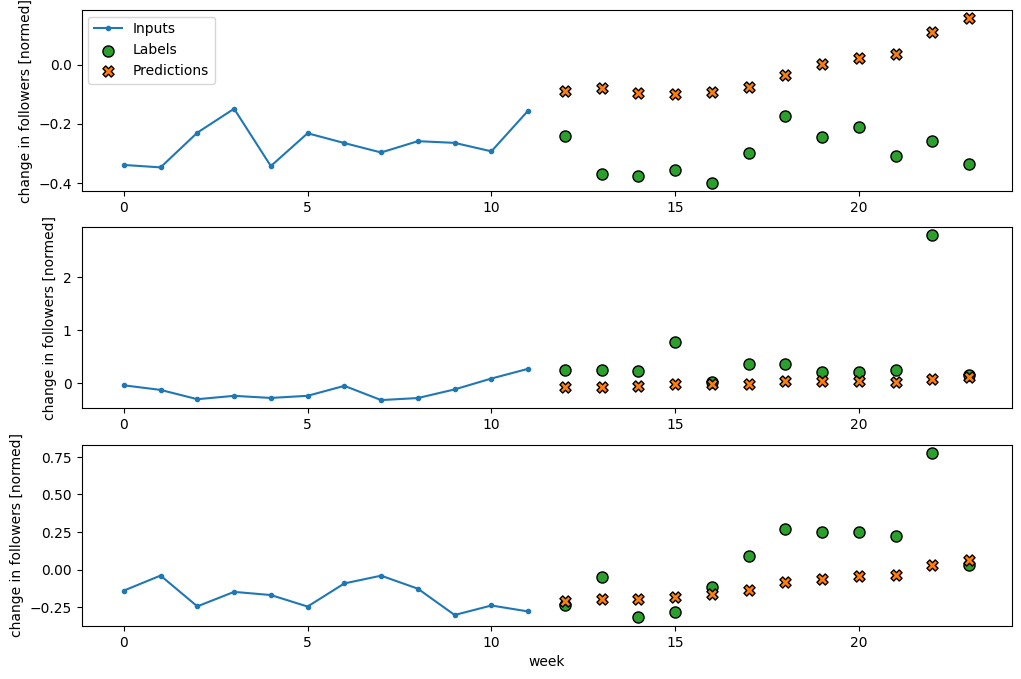

In [234]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

In [235]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [236]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [237]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [238]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 9])

In [239]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [240]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 12, 9)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8033 - mean_absolute_error: 0.5253 


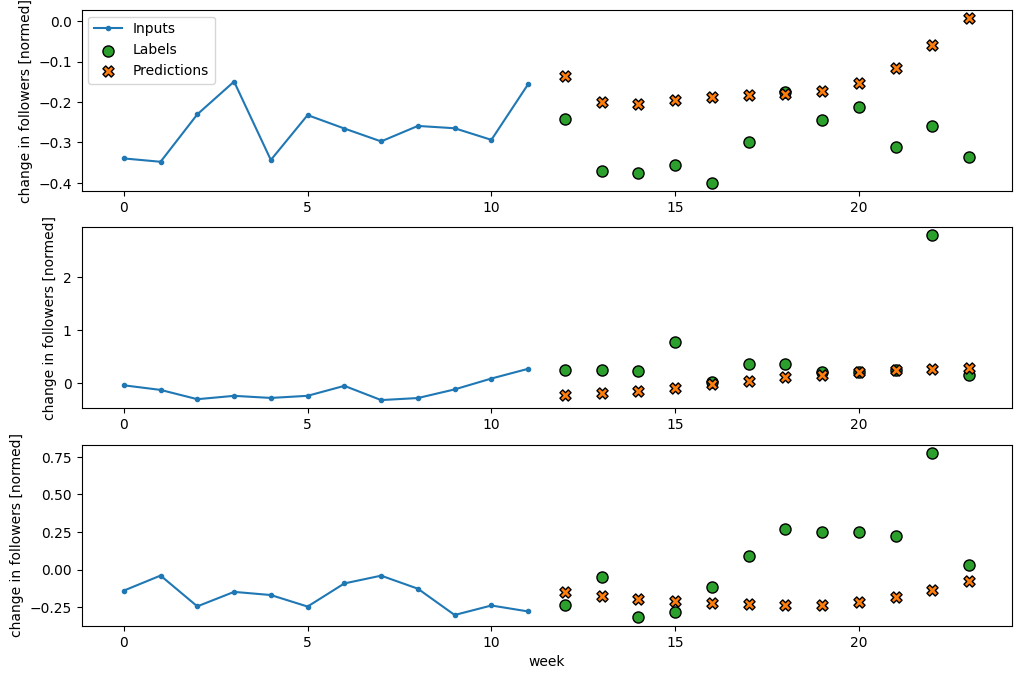

In [241]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

### Performance

In [242]:
multi_performance

{'Last': {'loss': 2.5107195377349854,
  'mean_absolute_error': 0.9059735536575317},
 'Repeat': {'loss': 2.832080364227295,
  'mean_absolute_error': 1.1510404348373413},
 'Linear': {'loss': 2.5260751247406006,
  'mean_absolute_error': 1.088206171989441},
 'Dense': {'loss': 2.2868552207946777,
  'mean_absolute_error': 0.7817066311836243},
 'Conv': {'loss': 2.3142833709716797,
  'mean_absolute_error': 0.8020757436752319},
 'LSTM': {'loss': 2.6569156646728516,
  'mean_absolute_error': 0.8456062078475952},
 'AR LSTM': {'loss': 2.563900947570801,
  'mean_absolute_error': 0.8051993250846863}}

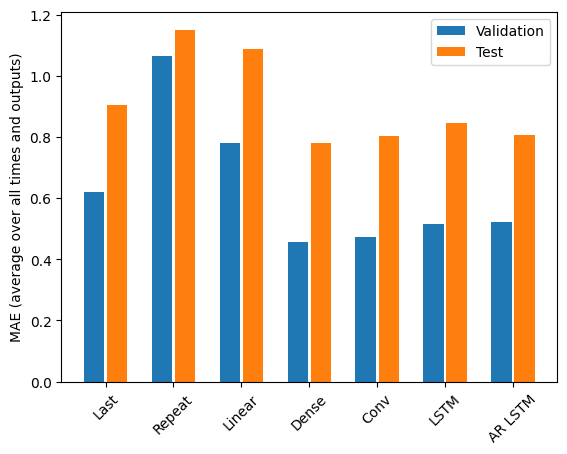

In [243]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in multi_val_performance.values()]
test_mae = [v[metric_name] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [244]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Last    : 0.9060
Repeat  : 1.1510
Linear  : 1.0882
Dense   : 0.7817
Conv    : 0.8021
LSTM    : 0.8456
AR LSTM : 0.8052
